# Prediction anonymized adult data set

## Imports

Importing needed packages:

In [14]:
import pandas 
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# turn of warnings
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [15]:
train= pandas.read_csv('../Anonymized_finished/train02.csv', index_col=0);
test= pandas.read_csv('../Anonymized_finished/test02.csv', index_col=0);

display(train.head())
display(test.head())

,Age,Workclass,fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Ethnicity,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,50k
0,"[40, 60[","{Federal-gov, Local-gov, State-gov}",92141.0,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Divorced, Windowed, Never-married}",Adm-clerical,Not-in-family,Black,Female,0.0,0.0,40.0,United-States,<=50K
1,"[40, 60[","{Federal-gov, Local-gov, State-gov}",131302.0,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Divorced, Windowed, Never-married}",Adm-clerical,Not-in-family,Black,Female,0.0,0.0,44.0,United-States,<=50K
2,"[40, 60[","{Federal-gov, Local-gov, State-gov}",139161.0,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Divorced, Windowed, Never-married}",Adm-clerical,Not-in-family,Black,Female,0.0,1741.0,40.0,United-States,<=50K
3,"[20, 40[","{Federal-gov, Local-gov, State-gov}",255830.0,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Divorced, Windowed, Never-married}",Adm-clerical,Own-child,Black,Female,0.0,0.0,45.0,United-States,<=50K
4,"[20, 40[","{Federal-gov, Local-gov, State-gov}",272986.0,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Divorced, Windowed, Never-married}",Adm-clerical,Own-child,Black,Female,0.0,0.0,8.0,United-States,<=50K


,Age,Workclass,fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Ethnicity,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,50k
0,"[40, 60[","{Federal-gov, Local-gov, State-gov}",96652.0,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Married-AF-spouse, Married-civ-spouse, Marrie...",Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K.
1,"[40, 60[","{Federal-gov, Local-gov, State-gov}",265386.0,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Married-AF-spouse, Married-civ-spouse, Marrie...",Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K.
2,"[40, 60[","{Federal-gov, Local-gov, State-gov}",47270.0,"{Assoc-acdm, Assoc-voc}","[10, 15[","{Married-AF-spouse, Married-civ-spouse, Marrie...",Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K.
3,"[20, 40[","{Federal-gov, Local-gov, State-gov}",90872.0,"{Prof-school, Some-college}","[10, 15[","{Divorced, Widowed, Never-married}",Adm-clerical,Not-in-family,Black,Female,0.0,0.0,40.0,United-States,<=50K.
4,"[20, 40[","{Federal-gov, Local-gov, State-gov}",243177.0,"{Prof-school, Some-college}","[10, 15[","{Divorced, Widowed, Never-married}",Adm-clerical,Not-in-family,Black,Female,0.0,0.0,40.0,United-States,<=50K.


Follwing attributes will be taken as predictor:

Age, Workclass, Education, Occupation, Ethnicity, Sex, Hours-per-week and Native-country

The attribute 50k is the target attribute.

## Data preparation

First, we will extract the predictors, labels and the target for the train and for the test dataset and also apply One-Hot Encoding for categorical attributes:

In [16]:
#Removing Rows with Laos because test predictors does not contain it -> Once Hot encoding 
train= train[train['Native-country']!='Laos']

train_predictors = train.drop(['fnlwgt','Marital-status','Relationship','Capital-gain','Capital-loss','50k'],axis=1)
train_target = train['50k'].astype('category')

test_predictors = test.drop(['fnlwgt','Marital-status','Relationship','Capital-gain','Capital-loss','50k'],axis=1)
test_target = test['50k'].astype('category')

## saving the labels
labels= list(train_predictors.columns)


## One-Hot Encoding
enc=np.array(["Age","Workclass","Education","Education-number","Occupation","Ethnicity","Native-country"])

train_predictors= pandas.get_dummies(train_predictors,columns=enc)
test_predictors= pandas.get_dummies(test_predictors,columns=enc)


#New Labels
labels2=list(train_predictors.columns)
labels3=list(test_predictors.columns)

## Transform targets
train_target = train_target.map({'<=50K': 0, '>50K':1}).astype('category')
test_target = test_target.map({'<=50K.':0, '>50K.':1}).astype('category')
test_predictors['Sex']=test_predictors['Sex'].map({'Male': 0, 'Female':1})
train_predictors['Sex']=train_predictors['Sex'].map({'Male': 0, 'Female':1})

## Transform everythin to np.array
train_predictors=np.array(train_predictors)
train_target=np.array(train_target)

test_predictors=np.array(test_predictors)
test_target=np.array(test_target)


## Random Forest

Finding right amount of trees:

In [189]:
rf_range = range(40, 70)

# list of scores from k_range
rf_scores = []

# 1. we will loop through reasonable values of k
for k in rf_range:
    # 2. run KNeighborsClassifier with k neighbours
    classifier = RandomForestClassifier(random_state=42,n_estimators=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(classifier, train_predictors, train_target, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    rf_scores.append(scores.mean())
print(rf_scores)

[0.7454545454545454, 0.7454545454545455, 0.7522727272727272, 0.7477272727272728, 0.75, 0.75, 0.7545454545454545, 0.7522727272727272, 0.7568181818181817, 0.7613636363636364, 0.759090909090909, 0.7545454545454545, 0.759090909090909, 0.7613636363636364, 0.7636363636363636, 0.7681818181818182, 0.7681818181818182, 0.7636363636363637, 0.7681818181818182, 0.7681818181818182, 0.7681818181818182, 0.7659090909090909, 0.7681818181818182, 0.7681818181818182, 0.7704545454545454, 0.7681818181818182, 0.7681818181818182, 0.7681818181818182, 0.7681818181818182, 0.7636363636363637]


Text(0, 0.5, 'Cross-Validated Accuracy')

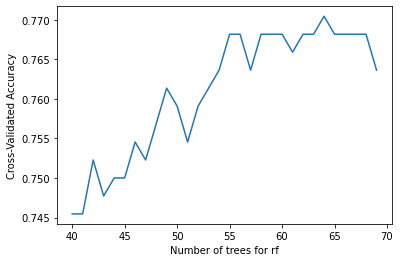

In [190]:
plt.plot(rf_range, rf_scores)
plt.xlabel('Number of trees for rf')
plt.ylabel('Cross-Validated Accuracy')

#### Prediction

In [106]:
classifier = RandomForestClassifier(random_state=42,n_estimators=64)
classifier = classifier.fit(train_predictors,train_target)

prediction = classifier.predict(test_predictors)

difference = prediction - test_target

In [107]:
feature_importances = pandas.DataFrame(classifier.feature_importances_,
                                   index = labels2,
                                    columns=['importance']).sort_values('importance',ascending=False)
display(feature_importances.head(20))

,importance
Hours-per-week,0.319754
Sex,0.087133
"Age_[40, 60[",0.066860
"Education_{Bachelors, Masters}",0.060791
Occupation_Exec-managerial,0.044206
"Age_[20, 40[",0.036562
Occupation_Prof-specialty,0.030956
"Education-number_[15, 17[",0.026024
"Education-number_[5, 10[",0.021466
"Education-number_[10, 15[",0.021430


#### Prediction

In [108]:
print('Total number of predictions:' + str(len(prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(difference))) 
print('Accuracy: '+ str(((len(prediction) - np.count_nonzero(difference))/len(prediction))*100)+' %')


Total number of predictions:12077
Total number of wrong predictions:2687
Accuracy: 77.75109712676989 %


In [109]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,7844,1014
Actual Positive,1673,1546


In [110]:
#metrics
print(classification_report(test_target, prediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      8858
           1       0.60      0.48      0.54      3219

    accuracy                           0.78     12077
   macro avg       0.71      0.68      0.69     12077
weighted avg       0.77      0.78      0.77     12077



## Naive Bayes
Train & predict with model

In [22]:
model = CategoricalNB()
model = model.fit(train_predictors,train_target)

naive_prediction= model.predict(test_predictors)
naive_difference = naive_prediction - test_target

#### Prediction

In [23]:
print('Total number of predictions:' + str(len(naive_prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(naive_difference))) 
print('Accuracy: '+ str(((len(naive_prediction) - np.count_nonzero(naive_difference))/len(naive_prediction))*100)+' %')
print("Accuracy:",metrics.accuracy_score(test_target, naive_prediction))


Total number of predictions:12077
Total number of wrong predictions:2892
Accuracy: 76.0536557091993 %
Accuracy: 0.7605365570919931


In [24]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,naive_prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,7105,1753
Actual Positive,1139,2080


In [25]:
#metrics
print(classification_report(test_target, naive_prediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      8858
           1       0.54      0.65      0.59      3219

    accuracy                           0.76     12077
   macro avg       0.70      0.72      0.71     12077
weighted avg       0.78      0.76      0.77     12077



## KNN 
Finding the right k

In [117]:
 k_range = range(1, 25)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, train_predictors, train_target, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.5818511026017456, 0.6152894276499293, 0.5974398242707333, 0.6248090976322286, 0.621279114282218, 0.6403579165776707, 0.6365106302931662, 0.6449198029179791, 0.6390892867871811, 0.6577717828448801, 0.6463877575864719, 0.6598343148323315, 0.6540828020047934, 0.6630076587434779, 0.6545193412606115, 0.6700685062288828, 0.6613816188269134, 0.6693545195771853, 0.6753441590245428, 0.6797864630206976, 0.6774859774248414, 0.684744718512001, 0.6757404180773651, 0.6860931852062029]


Text(0, 0.5, 'Cross-Validated Accuracy')

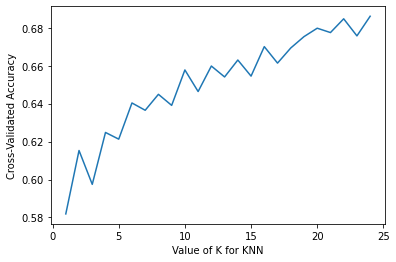

In [118]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Prediction

Train and predict with model

In [127]:
knn_model = KNeighborsClassifier(n_neighbors=22)
knn_model.fit(train_predictors, train_target)

knn_prediction=knn_model.predict(test_predictors)
knn_difference = knn_prediction - test_target

In [128]:
print('Total number of predictions:' + str(len(knn_prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(knn_difference))) 
print('Accuracy: '+ str(((len(knn_prediction) - np.count_nonzero(knn_difference))/len(knn_prediction))*100)+' %')
print("Accuracy:",metrics.accuracy_score(test_target, knn_prediction))


Total number of predictions:12077
Total number of wrong predictions:2599
Accuracy: 78.4797549060197 %
Accuracy: 0.784797549060197


In [129]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,knn_prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,8070,788
Actual Positive,1811,1408


In [130]:
#metrics
print(classification_report(test_target, knn_prediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      8858
           1       0.64      0.44      0.52      3219

    accuracy                           0.78     12077
   macro avg       0.73      0.67      0.69     12077
weighted avg       0.77      0.78      0.77     12077



## Voting Classifier
Train & predict with model

In [131]:
voting_pred=[]
i=0
while i < len(prediction):
    tmp=prediction[i]+naive_prediction[i]+knn_prediction[i]
    if tmp>1:
        voting_pred.append(1)
    else:
        voting_pred.append(0)
    i += 1
voting_diff=voting_pred-test_target

#### Prediction

In [132]:
print('Total number of predictions:' + str(len(voting_pred)))
print('Total number of wrong predictions:' + str(np.count_nonzero(voting_diff))) 
print('Accuracy: '+ str(((len(knn_prediction) - np.count_nonzero(voting_diff))/len(voting_pred))*100)+' %')
print("Accuracy:",metrics.accuracy_score(test_target, voting_pred))


Total number of predictions:12077
Total number of wrong predictions:2564
Accuracy: 78.76956197731224 %
Accuracy: 0.7876956197731224


In [133]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,voting_pred)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,7870,988
Actual Positive,1576,1643


In [134]:
#metrics
print(classification_report(test_target, voting_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      8858
           1       0.62      0.51      0.56      3219

    accuracy                           0.79     12077
   macro avg       0.73      0.70      0.71     12077
weighted avg       0.78      0.79      0.78     12077

